# Data Preparation

# Data Analysis

# Model Selection

# Model Training

In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [247]:
df = pd.read_csv('cleaned_data.csv')

In [248]:
cat_mapping2 = {'graduate school':1,'university':2,'high school':3,'others':4}
df['ED']=df['EDUCATION_CAT'].map(cat_mapping2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [249]:
Non_features = ['ID','default payment next month', 'EDUCATION_CAT','graduate school','high school','others','university']
X = df.drop(columns=Non_features)
Y = df.iloc[:,24]

In [250]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  26664 non-null  int64
 1   SEX        26664 non-null  int64
 2   EDUCATION  26664 non-null  int64
 3   MARRIAGE   26664 non-null  int64
 4   AGE        26664 non-null  int64
 5   PAY_1      26664 non-null  int64
 6   PAY_2      26664 non-null  int64
 7   PAY_3      26664 non-null  int64
 8   PAY_4      26664 non-null  int64
 9   PAY_5      26664 non-null  int64
 10  PAY_6      26664 non-null  int64
 11  BILL_AMT1  26664 non-null  int64
 12  BILL_AMT2  26664 non-null  int64
 13  BILL_AMT3  26664 non-null  int64
 14  BILL_AMT4  26664 non-null  int64
 15  BILL_AMT5  26664 non-null  int64
 16  BILL_AMT6  26664 non-null  int64
 17  PAY_AMT1   26664 non-null  int64
 18  PAY_AMT2   26664 non-null  int64
 19  PAY_AMT3   26664 non-null  int64
 20  PAY_AMT4   26664 non-null  int64
 21  PAY_AMT5   2

In [251]:
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [190]:
scale = StandardScaler()

X_arr = scale.fit_transform(X)
Y_arr = Y

print(X_arr.shape,Y_arr.shape)

(26664, 24) (26664, 1)


In [220]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 3)

In [221]:
X_pca = pca.fit_transform(X_arr)
print(X_pca.shape)

(26664, 3)


<IPython.core.display.Javascript object>


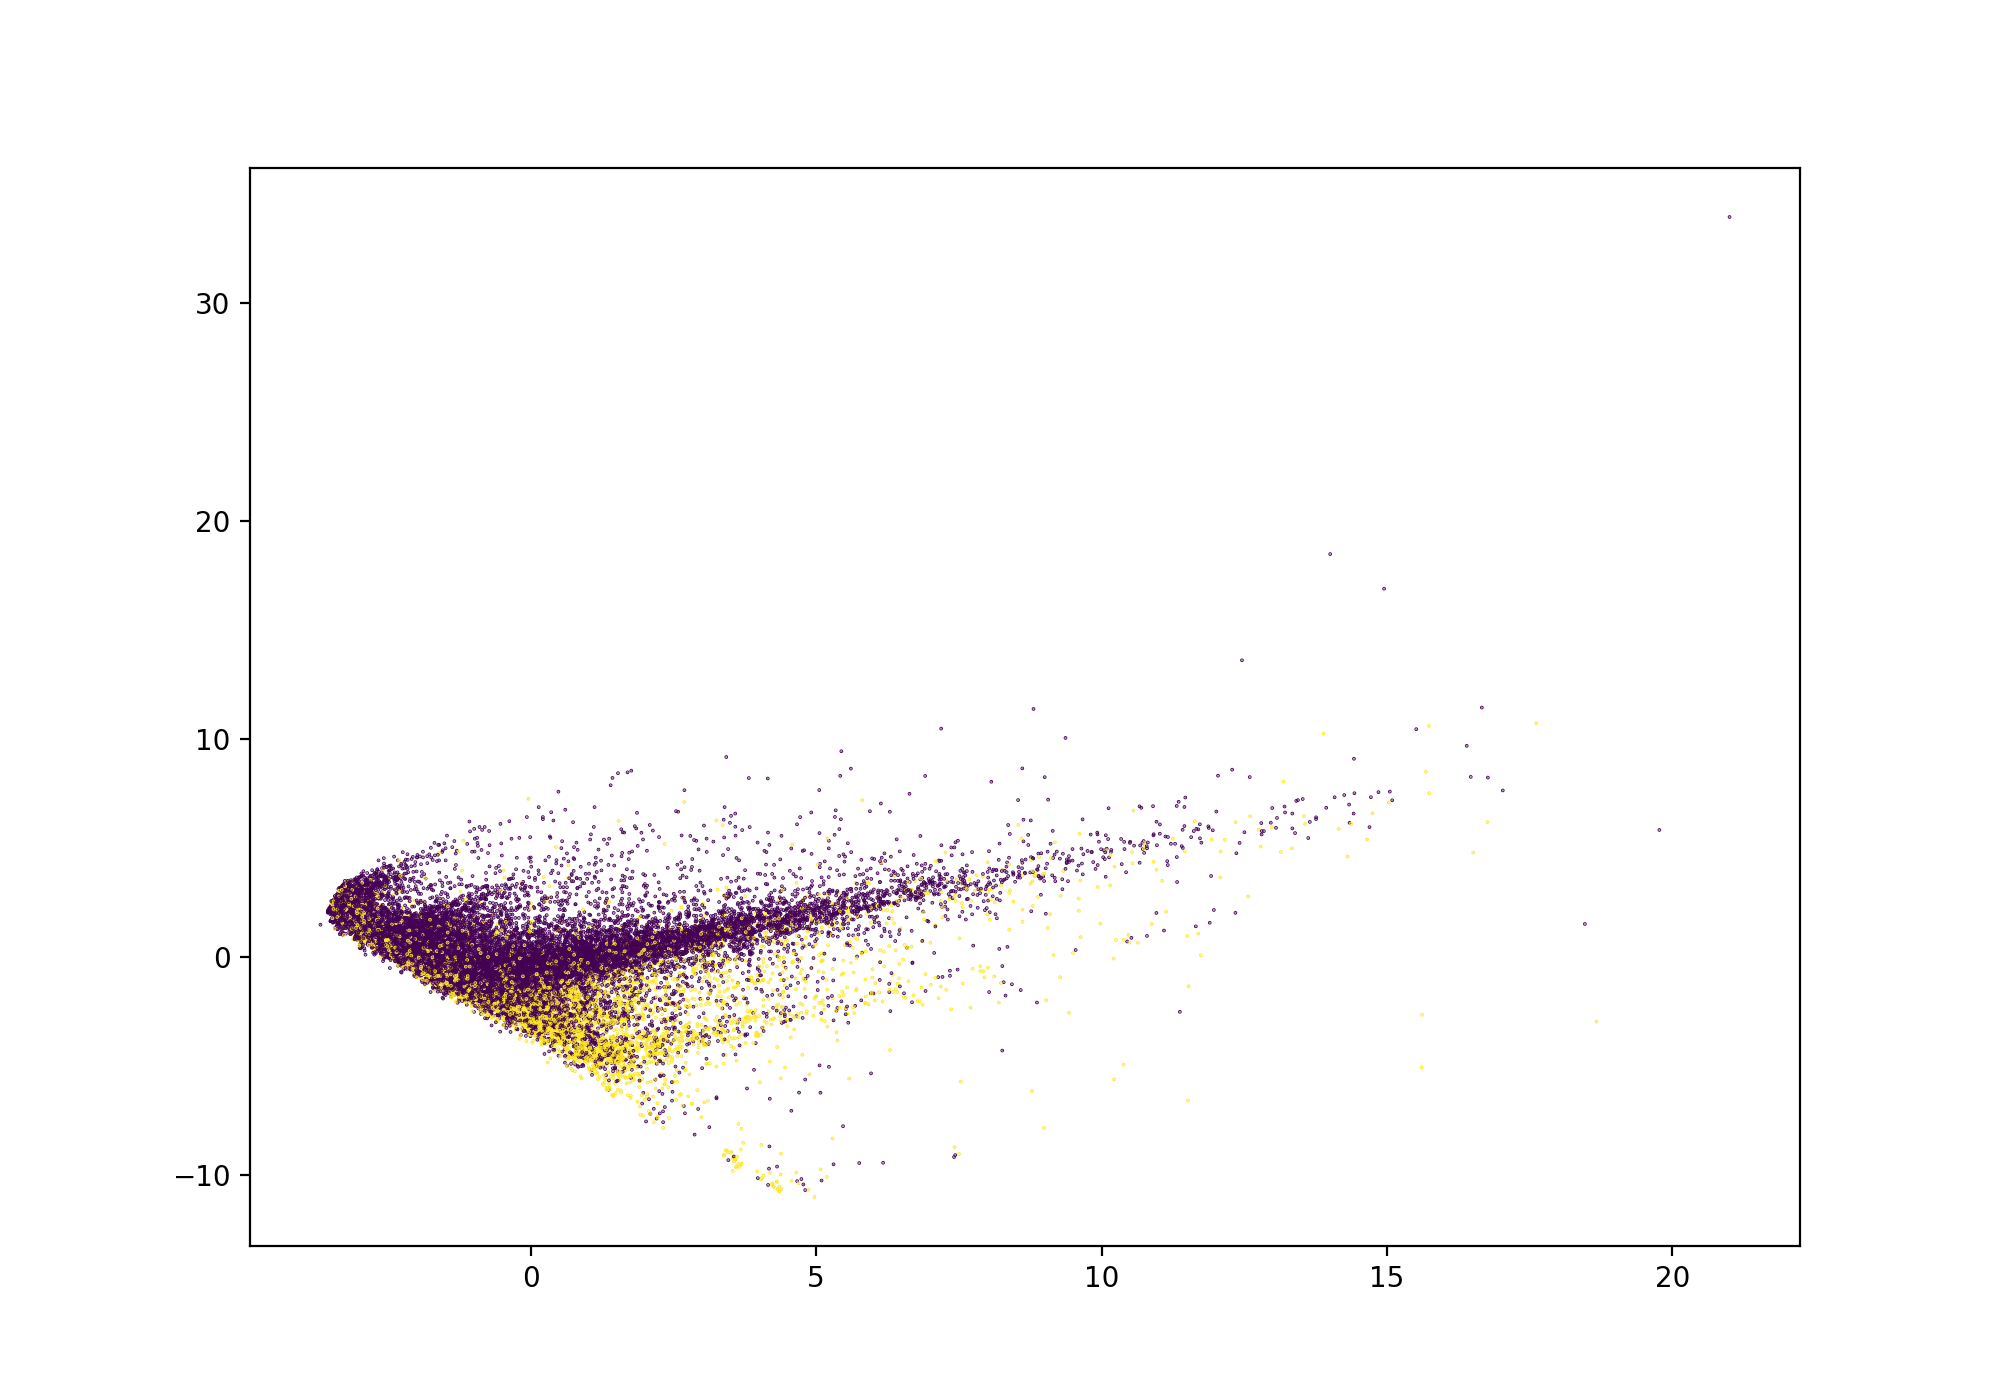

In [235]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0],X_pca[:,1],c = df['default payment next month'],s=0.1)
plt.show()

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y_arr, test_size=0.2, random_state=42)

In [214]:
clf = RandomForestClassifier(n_estimators=100)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [215]:
RF_clf = GridSearchCV(clf, param_grid=param_grid, n_jobs=-1, cv=5)

In [216]:
RF_clf = RF_clf.fit(X_train, Y_train)
print('The best model:\n', grid_search.best_params_)

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
840 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
 

NameError: name 'grid_search' is not defined

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:

In [217]:
print('The best model:\n', RF_clf.best_params_)

The best model:
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 10, 'min_samples_split': 3}


In [218]:
RF_clf = RandomForestClassifier(bootstrap = False,criterion = 'entropy', max_depth = 3, max_features = 1, min_samples_leaf =10, min_samples_split =3)
RF_clf = RF_clf.fit(X_train, Y_train)

/var/folders/py/5s9c0hkd3jg_qm19cvdv5ktw0000gn/T/ipykernel_9796/1125085115.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_clf = RF_clf.fit(X_train, Y_train)


In [219]:
RF_clf.score(X_test,Y_test)

0.8104256516032252

In [236]:
from sklearn.svm import SVC
clf_0 = SVC(class_weight='balanced', random_state=36)

parameters = {'C': [0.1, 1, 10],
    'gamma': [1e-07, 1e-08, 1e-06],
    'kernel' : ['rbf', 'linear'] }


grid_search = GridSearchCV(clf_0, parameters, n_jobs=-1, cv=5)

grid_search.fit(X_train, Y_train)
print('The best model:\n', grid_search.best_params_)

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best model:
 {'C': 10, 'gamma': 1e-06, 'kernel': 'rbf'}


/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [237]:
clf_best = grid_search.best_estimator_
accuracy = clf_best.score(X_test, Y_test)
print(accuracy)

/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

0.7183573973373336


# Results

# Model Compare

In [7]:
X_feature = df.columns[1:24].append(df.columns[30:31])
Y_feature = df.columns[24]

X = pd.DataFrame(df.copy()[X_feature].copy())
Y = pd.DataFrame(df.copy()[Y_feature].copy())

X = X.reindex(labels=X.columns,axis=1)
Y = Y.reindex(labels=Y.columns,axis=1)

In [9]:
X.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,ED
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,2
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,2


In [10]:
Y.head(2)

,default payment next month
0,1
1,1


In [122]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_arr = scale.fit_transform(X)
Y_arr = Y.to_numpy()

print(X_arr.shape,Y_arr.shape)
print(X_arr.dtype)

(26664, 24) (26664, 1)
float64


In [123]:
count = 0
for i in Y_arr:
    if i[0] == 1:
        count+=1
print(count)

5914


In [152]:
grouped = df.groupby(df['default payment next month'])
df_new_0 = grouped.get_group(0)
df_new_1 = grouped.get_group(1)

In [157]:
df_new_0 = df_new_0.sample(n = 5914, random_state =42)

df = df_new_1.append(df_new_0).sample(frac=1)

In [158]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
23018,7d355d33-f15e,170000,2,1,1,35,2,2,2,2,...,11000,5500,5500,5400,1,graduate school,1,0,0,0
13070,35900bb8-a98a,80000,2,3,1,30,2,2,2,2,...,2000,1900,1900,0,1,high school,0,1,0,0
25155,566875d8-2068,300000,2,3,2,36,-2,-2,-2,-2,...,0,6536,1400,50000,0,high school,0,1,0,0
16835,2e680378-c42a,390000,2,3,1,28,0,0,0,0,...,6000,10000,5000,5000,1,high school,0,1,0,0
18685,12117ef0-c640,50000,1,2,2,32,-1,2,2,-1,...,780,0,0,0,1,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,9c46af28-b13e,30000,1,3,1,49,2,2,2,2,...,3712,1363,0,1141,0,high school,0,1,0,0
9565,3e55426b-f8b7,500000,1,1,1,41,2,0,0,0,...,15853,17000,17000,15740,1,graduate school,1,0,0,0
2598,3668d835-f70e,20000,1,1,1,29,0,0,0,-1,...,556,20191,1742,0,0,graduate school,1,0,0,0
9665,d7d5cd9e-b265,300000,1,2,2,33,0,0,0,0,...,6000,6100,245000,7600,0,university,0,0,0,1


In [159]:
X_feature = df.columns[1:24].append(df.columns[30:31])
Y_feature = df.columns[24]

X = pd.DataFrame(df.copy()[X_feature].copy())
Y = pd.DataFrame(df.copy()[Y_feature].copy())

X = X.reindex(labels=X.columns,axis=1)
Y = Y.reindex(labels=Y.columns,axis=1)

In [160]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_arr = scale.fit_transform(X)
Y_arr = Y.to_numpy()

print(X_arr.shape,Y_arr.shape)
print(X_arr.dtype)

(11828, 23) (11828, 1)
float64


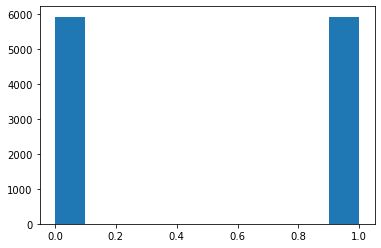

In [161]:
plt.hist(Y)
plt.show()

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_arr, Y_arr, test_size=0.2, random_state=42)

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(5, input_dim = len(X_train[0, :]), activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 4         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [213]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'binary_crossentropy',optimizer = opt, metrics=['accuracy'])
model.fit(X_train, Y_train, validation_data =(X_test, Y_test), epochs = 20, batch_size = 10 )

Epoch 1/20
2134/2134 [==============================] - 2s 1ms/step - loss: 0.7942 - accuracy: 0.4516 - val_loss: 0.6723 - val_accuracy: 0.6747
Epoch 2/20
2134/2134 [==============================] - 2s 970us/step - loss: 0.6348 - accuracy: 0.7551 - val_loss: 0.6040 - val_accuracy: 0.7804
Epoch 3/20
2134/2134 [==============================] - 2s 1ms/step - loss: 0.5891 - accuracy: 0.7761 - val_loss: 0.5667 - val_accuracy: 0.7847
Epoch 4/20
2134/2134 [==============================] - 2s 876us/step - loss: 0.5575 - accuracy: 0.7800 - val_loss: 0.5360 - val_accuracy: 0.7947
Epoch 5/20
2134/2134 [==============================] - 2s 946us/step - loss: 0.5299 - accuracy: 0.7900 - val_loss: 0.5104 - val_accuracy: 0.8012
Epoch 6/20
2134/2134 [==============================] - 2s 890us/step - loss: 0.5091 - accuracy: 0.7949 - val_loss: 0.4927 - val_accuracy: 0.8031
Epoch 7/20
2134/2134 [==============================] - 2s 879us/step - loss: 0.4954 - accuracy: 0.7970 - val_loss: 0.4810 - val